In [75]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [77]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [78]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-12.167250640885797 -3.0066746355548446
27.17596399256928 -82.94969777669748
67.75273153276194 -91.27907708503977
-11.934283180199955 65.37183043369109
-54.311879249335426 -169.11590864163875
-7.390280607383119 -53.17892414561341
-45.032544916280145 40.37536578765864
-29.27457040875742 -171.4370762281553
-65.17719163810216 -161.88392249960208
-78.78460901511968 26.4269428573528
-49.539235346089576 31.91750555767925
-47.609804493581215 178.0231865415907
-76.28073248901977 -26.11929396466465
41.77649831507472 -25.49127324075738
35.908731085235175 -74.6620283089517
-62.86165125841742 -112.56104396578034
-73.04739004982292 -56.428459417259916
79.75192449219085 54.84101266896383
19.933497382393426 -1.0566531141828932
31.36423834346168 -76.36915388510009
88.29361513825287 144.46672552939054
58.69657959923455 -62.92561232719399
69.27922211417004 5.968141606891351
49.81505087372733 86.29905564561591
76.85682288634294 -117.64316271744832
36.2606548945343 -54.67920326062651
70.9897570784907 82.7

-65.58482242075345 75.15055681156988
-79.99137656377792 163.59040253440548
37.47285262817367 165.81065331013593
21.21556985521501 -157.41935941967694
68.1226140558328 82.20609473022222
86.41544064198396 41.80869662865774
-72.38435132495601 41.599359362575285
2.4339488758714225 -19.799598804693687
-20.978976825218552 115.46963323463461
-51.572791212612856 46.16393932929034
9.740521857465822 139.74225448135974
-53.06686265613083 -114.4123138907074
-44.41319230329226 -1.1897408360142094
-6.804111166638961 -61.40808177949455
85.5108699488004 117.36024813173054
52.75723477374993 -140.15470775338102
-17.382945938513743 -170.5722252928357
87.79768878374705 -57.749260664447974
67.13542460169532 -110.80287599546183
-85.57439853993421 14.551917347828947
20.592399475743193 88.81690544755139
0.986219123625105 121.46902351063358
74.73541680050627 171.37829297228456
88.82349495549113 149.9348590664854
87.26876310495771 -167.46063262034664
85.14192706842803 -108.95770239451583
-33.47548142919027 17.2

In [79]:
from citipy import citipy

In [80]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [81]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [82]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39aed027b0b67abc289439e406a0ede4


In [83]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [84]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [85]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bayshore gardens
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | sao felix do xingu
Processing Record 7 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | waipawa
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | virginia beach
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | tessalit
Processing Record 18 of Set 1 | wilmington
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | sistranda
Processing Record 22 of Set 1 | ust-koksa
P

Processing Record 36 of Set 4 | otjiwarongo
Processing Record 37 of Set 4 | palana
Processing Record 38 of Set 4 | moussoro
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | saucillo
Processing Record 41 of Set 4 | anchorage
Processing Record 42 of Set 4 | panzhihua
Processing Record 43 of Set 4 | kearney
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | benalla
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | muros
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | harboore
Processing Record 1 of Set 5 | cairo montenotte
Processing Record 2 of Set 5 | makuyuni
Processing Record 3 of Set 5 | tubruq
City not found. Skipping...
Processing Record 4 of Set 5 | henties bay
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | tuy hoa
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | s

Processing Record 25 of Set 8 | kortkeros
Processing Record 26 of Set 8 | benguela
Processing Record 27 of Set 8 | harnosand
Processing Record 28 of Set 8 | pudsey
Processing Record 29 of Set 8 | dubrovnik
Processing Record 30 of Set 8 | college
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | jalu
Processing Record 33 of Set 8 | umarizal
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | seoul
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | zhangye
Processing Record 38 of Set 8 | chiredzi
Processing Record 39 of Set 8 | merke
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | pretoria
Processing Record 43 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 44 of Set 8 | tilichiki
Processing Record 45 of Set 8 | dujuma
City not found. Skipping...
Processing Record 46 of Set 8 | kathu
Processing Record 47 of Set 8 | tonantins
Processing Record 48 of 

Processing Record 13 of Set 12 | tshane
Processing Record 14 of Set 12 | babanusah
City not found. Skipping...
Processing Record 15 of Set 12 | athol
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | santa fe
Processing Record 18 of Set 12 | mogzon
Processing Record 19 of Set 12 | gradignan
Processing Record 20 of Set 12 | irbeyskoye
Processing Record 21 of Set 12 | pryazha
Processing Record 22 of Set 12 | defiance
Processing Record 23 of Set 12 | el alto
Processing Record 24 of Set 12 | nizhniy tsasuchey
Processing Record 25 of Set 12 | okhotsk
Processing Record 26 of Set 12 | gorom-gorom
Processing Record 27 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 28 of Set 12 | sosua
Processing Record 29 of Set 12 | bilibino
Processing Record 30 of Set 12 | dzhebariki-khaya
Processing Record 31 of Set 12 | pangkalanbuun
Processing Record 32 of Set 12 | chake chake
Processing Record 33 of Set 12 | joplin
Processing Record 34 of Set 12 | tamand

In [86]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,73.94,10,72,6.73,US,2022-06-11 20:28:16
1,Bayshore Gardens,27.4253,-82.5904,86.04,56,75,12.66,US,2022-06-11 20:28:16
2,Thompson,55.7435,-97.8558,68.16,34,20,12.66,CA,2022-06-11 20:26:35
3,Grand Gaube,-20.0064,57.6608,73.80,81,83,5.99,MU,2022-06-11 20:28:17
4,Vaini,-21.2000,-175.2000,77.16,83,75,5.75,TO,2022-06-11 20:28:17
5,Sao Felix Do Xingu,-6.6447,-51.9950,85.39,60,89,1.28,BR,2022-06-11 20:28:18
6,Mataura,-46.1927,168.8643,38.48,91,99,6.46,NZ,2022-06-11 20:28:18
7,Bredasdorp,-34.5322,20.0403,63.28,36,100,3.71,ZA,2022-06-11 20:28:19
8,Port Alfred,-33.5906,26.8910,67.57,37,28,12.50,ZA,2022-06-11 20:28:19
9,Waipawa,-41.4122,175.5153,51.40,74,100,17.65,NZ,2022-06-11 20:28:19


In [87]:
new_column_order = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,72,US,2022-06-11 20:28:16,10,42.0970,-79.2353,73.94,6.73
1,Bayshore Gardens,75,US,2022-06-11 20:28:16,56,27.4253,-82.5904,86.04,12.66
2,Thompson,20,CA,2022-06-11 20:26:35,34,55.7435,-97.8558,68.16,12.66
3,Grand Gaube,83,MU,2022-06-11 20:28:17,81,-20.0064,57.6608,73.80,5.99
4,Vaini,75,TO,2022-06-11 20:28:17,83,-21.2000,-175.2000,77.16,5.75
...,...,...,...,...,...,...,...,...,...
551,Kaitong,100,CN,2022-06-11 20:43:56,80,44.8135,123.1500,64.98,11.16
552,Varhaug,94,NO,2022-06-11 20:43:56,90,58.6147,5.6457,55.89,17.49
553,Antsohihy,1,MG,2022-06-11 20:43:57,60,-14.8796,47.9875,72.81,10.63
554,Forbes,97,AU,2022-06-11 20:43:57,79,-33.3833,148.0167,45.19,8.55


In [88]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [89]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

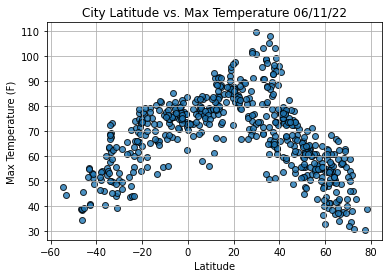

In [90]:
# Scatter plots for Latitude vs. Temperature

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

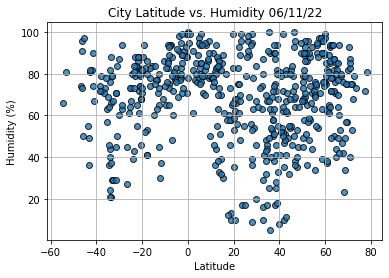

In [91]:
# Plot Latitude vs. Humidity

# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

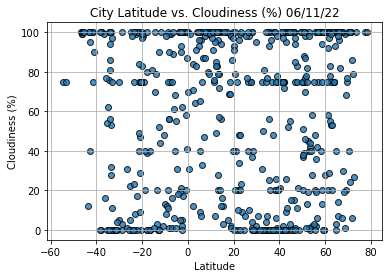

In [92]:
# Plot Latitude vs. Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

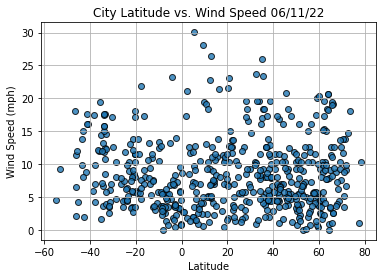

In [93]:
# Plot Latitude vs. Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [136]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [137]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Cloudiness                     75
Country                        CL
Date          2022-06-11 20:24:16
Humidity                       81
Lat                        -53.15
Lng                      -70.9167
Max Temp                    44.71
Wind Speed                   9.22
Name: 13, dtype: object

In [138]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
551     True
552     True
553    False
554    False
555    False
Name: Lat, Length: 556, dtype: bool

In [139]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,72,US,2022-06-11 20:28:16,10,42.0970,-79.2353,73.94,6.73
1,Bayshore Gardens,75,US,2022-06-11 20:28:16,56,27.4253,-82.5904,86.04,12.66
2,Thompson,20,CA,2022-06-11 20:26:35,34,55.7435,-97.8558,68.16,12.66
11,Praia Da Vitoria,75,PT,2022-06-11 20:28:20,94,38.7333,-27.0667,62.76,5.57
12,Virginia Beach,75,US,2022-06-11 20:26:18,53,36.8529,-75.9780,84.00,12.66
14,Tessalit,93,ML,2022-06-11 20:28:21,35,20.1986,1.0114,87.53,21.56
15,Wilmington,0,US,2022-06-11 20:25:33,70,34.2257,-77.9447,80.94,11.50
16,Chokurdakh,24,RU,2022-06-11 20:28:21,40,70.6333,147.9167,54.00,11.70
17,Iqaluit,75,CA,2022-06-11 20:28:22,50,63.7506,-68.5145,49.73,18.41
18,Sistranda,100,NO,2022-06-11 20:28:22,82,63.7256,8.8340,60.76,7.72


In [164]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


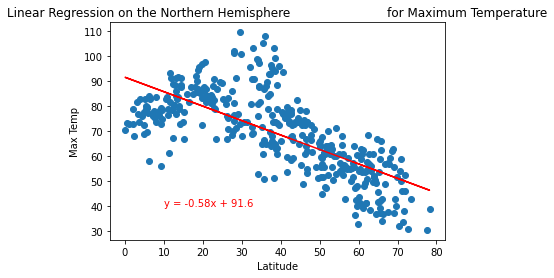

LinregressResult(slope=-0.5773011922634999, intercept=91.60304633178531, rvalue=-0.7156002820718008, pvalue=2.427852374847867e-61, stderr=0.028869688547626608, intercept_stderr=1.2690845447590016)

In [165]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
linregress(x_values, y_values)

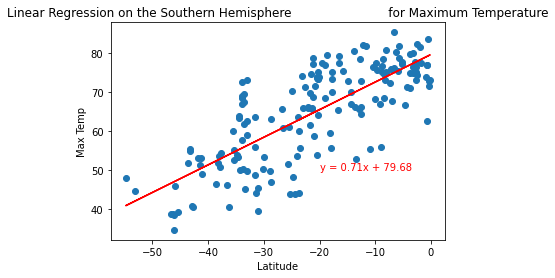

LinregressResult(slope=0.7079561921873595, intercept=79.68147330413325, rvalue=0.7748740600236752, pvalue=6.762844193082575e-36, stderr=0.044164543689708534, intercept_stderr=1.1007379765179621)

In [166]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-20,50))
linregress(x_values,y_values)

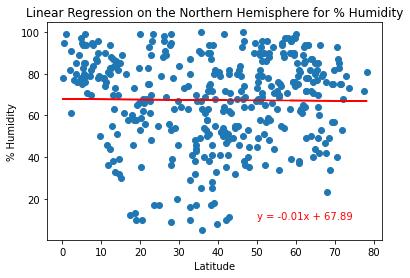

LinregressResult(slope=-0.01164016784950386, intercept=67.88650790836901, rvalue=-0.010705599776683315, pvalue=0.8345779178770789, stderr=0.05570072690875534, intercept_stderr=2.4485519313839155)

In [167]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,10))
linregress(x_values,y_values)

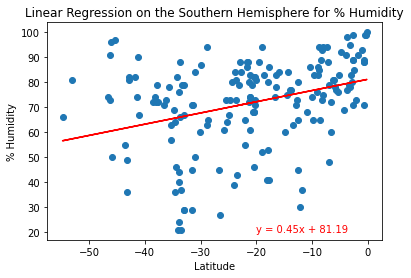

LinregressResult(slope=0.44808152725501754, intercept=81.18592449127091, rvalue=0.34020857903964274, pvalue=4.657316785566986e-06, stderr=0.09471161729104435, intercept_stderr=2.3605513667739157)

In [169]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-20,20))
linregress(x_values,y_values)

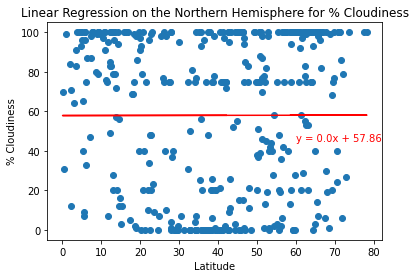

LinregressResult(slope=0.002526802467806559, intercept=57.86191424513864, rvalue=0.0012726565765227324, pvalue=0.9801945654572947, stderr=0.10171786283189178, intercept_stderr=4.4714222473481575)

In [172]:
# Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(60,45))
linregress(x_values,y_values)

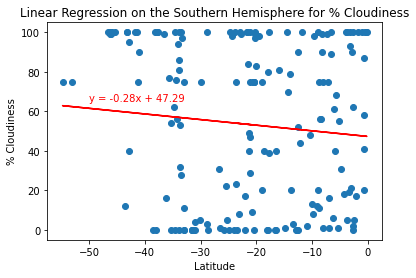

LinregressResult(slope=-0.28416169166037847, intercept=47.29266395671402, rvalue=-0.09563500731885675, pvalue=0.21070327870940012, stderr=0.22618062530143643, intercept_stderr=5.637228034575751)

In [176]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,65))
linregress(x_values,y_values)

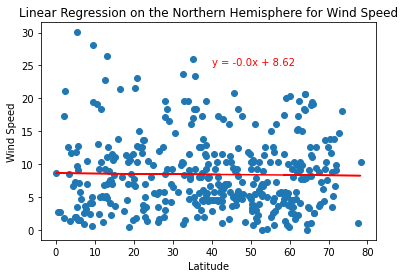

LinregressResult(slope=-0.004657593825575317, intercept=8.618631599658576, rvalue=-0.016602945840430712, pvalue=0.7460240993941414, stderr=0.014369911939168544, intercept_stderr=0.6316879075942056)

In [179]:
# Find the Correlation Between Latitude and Wind Speed

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))
linregress(x_values,y_values)

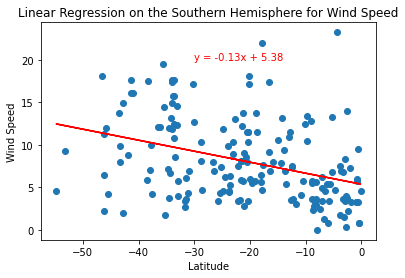

LinregressResult(slope=-0.12932523007301994, intercept=5.375331528357359, rvalue=-0.36233513270597184, pvalue=9.6462342086188e-07, stderr=0.025439758346913862, intercept_stderr=0.6340495290210187)

In [182]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,20))
linregress(x_values,y_values)